#BIPLOT ANALISIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
 
# ## Data Import
 
my_csv = '20rawdata.csv' ## path to your dataset
df = pd.read_csv(my_csv)
df.head()

,no.,csq1,csq2,csq3,csq4,csq5,csq6,csq7,csq8,csq9,csq10,csq11
0,1,19,p,3,4,bolu,rasa,10,4,murah,5,sudah baik
1,2,20,l,2,4,donat,tampilan,7,5,enak,5,mungkin kecepatan pelayanan
2,3,22,p,5,3,kue,tekstur,8,4,terjangkau,5,rasanya sudah enak
3,4,19,l,3,4,bolu,rasa,9,4,produk menarik,5,tidak perlu
4,5,29,p,4,5,snack,tekstur lembut,9,5,murah,5,cukup


In [ ]:
df_new = df.drop(['csq6', 'csq1', 'no.', 'csq2', 'csq9', 'csq11'], axis=1)
df_new

,csq3,csq4,csq5,csq7,csq8,csq10
0,3,4,bolu,10,4,5
1,2,4,donat,7,5,5
2,5,3,kue,8,4,5
3,3,4,bolu,9,4,5
4,4,5,snack,9,5,5
5,4,3,kue,6,5,4
6,3,4,roti,5,4,3
7,2,3,donat,3,4,2
8,4,2,roti,2,3,4
9,5,2,kue,7,3,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['csq5'] = le.fit_transform(df_new['csq5'])
print(le.classes_)
print(np.sort(df_new['csq5'].unique()))

['bolu' 'donat' 'kue' 'roti' 'snack']
[0 1 2 3 4]


In [ ]:
x = df_new[['csq3', 'csq4', 'csq7', 'csq8', 'csq10']].values
y = df_new['csq5'].values

In [ ]:
x

array([[ 3,  4, 10,  4,  5],
       [ 2,  4,  7,  5,  5],
       [ 5,  3,  8,  4,  5],
       [ 3,  4,  9,  4,  5],
       [ 4,  5,  9,  5,  5],
       [ 4,  3,  6,  5,  4],
       [ 3,  4,  5,  4,  3],
       [ 2,  3,  3,  4,  2],
       [ 4,  2,  2,  3,  4],
       [ 5,  2,  7,  3,  4],
       [ 3,  5,  7,  3,  4],
       [ 3,  4,  9,  4,  3],
       [ 1,  3, 10,  4,  3],
       [ 2,  1,  5,  3,  4],
       [ 2,  2,  6,  3,  5],
       [ 5,  4,  6,  5,  5],
       [ 4,  5,  8,  4,  4],
       [ 3,  4,  3,  4,  1],
       [ 1,  3,  1,  2,  1],
       [ 2,  4,  9,  3,  5]])

No handles with labels found to put in legend.


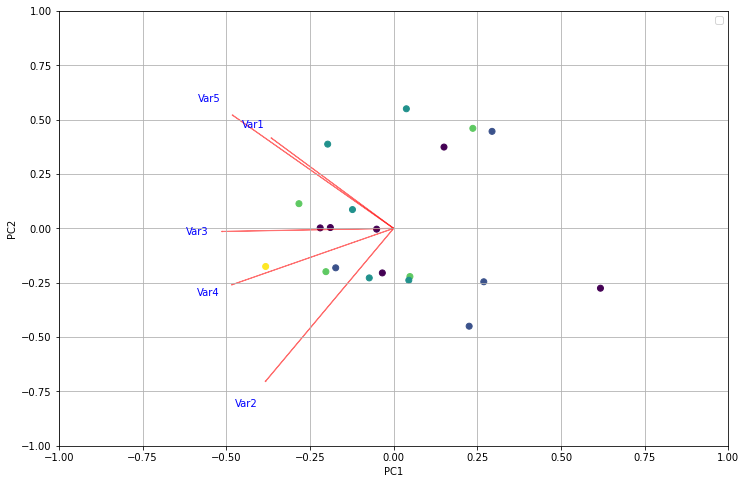

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)    
pca = PCA()
x_new = pca.fit_transform(x)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'b', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(12,8))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
!pip install semopy

     |████████████████████████████████| 1.6 MB 15.8 MB/s 
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657802 sha256=199979e40b3f7c8c40a14b539ab3522a599e124bcec05ed587916b1695d3b993
  Stored in directory: /root/.cache/pip/wheels/6e/7c/8d/e50ec69d2674e8bc29217ea96f904e4aec6b9df9a585cf7e24
Successfully built semopy


#SEM ANALISIS

In [ ]:
import semopy as sem
import pandas as pd
import numpy as np
from semopy import Model

data = pd.read_csv("20rawdata.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mod = """
# measurement model
Kinarja =~ csq7 + csq10
Motivasi =~ csq3 + csq4 + csq8
    """

In [ ]:
model = Model(mod)
model.fit(data, obj="MLW", solver="SLSQP")

SolverResult(fun=0.3209979615500771, success=True, n_it=34, x=array([0.37820086, 1.20176539, 1.31207057, 0.84254618, 0.23333796,
       1.26264098, 1.20002276, 0.78922662, 0.24794259, 0.65330028,
       5.48524929]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [ ]:
model.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,csq7,~,Kinarja,1.000000,0.901601,-,-,-
1,csq10,~,Kinarja,0.378201,0.694399,0.204099,1.85303,0.0638779
2,csq3,~,Motivasi,1.000000,0.413806,-,-,-
3,csq4,~,Motivasi,1.201765,0.558668,0.857465,1.40153,0.161055
4,csq8,~,Motivasi,1.312071,0.804085,0.937567,1.39944,0.16168
5,Motivasi,~~,Motivasi,0.247943,1.000000,0.304614,0.813956,0.41567
6,Motivasi,~~,Kinarja,0.653300,0.560195,0.548829,1.19035,0.233907
7,Kinarja,~~,Kinarja,5.485249,1.000000,3.40096,1.61285,0.106776
8,csq10,~~,csq10,0.842546,0.517810,0.466619,1.80564,0.0709745
9,csq8,~~,csq8,0.233338,0.353447,0.230004,1.0145,0.310346


In [ ]:
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,10,6.419959,0.169904,27.59737,0.862482,0.767371,0.418427,0.767371,0.656204,0.178442,21.358004,32.311059,0.320998


In [ ]:
g = sem.semplot(model, "model.png")

#REGRESI ANALISIS BERGANDA


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_excel("20rawdata.xlsx")
df.head()

,no.,csq1,csq2,csq3,csq4,csq5,csq6,csq7,csq8,csq9,csq10,csq11
0,1,19,p,3,4,bolu,rasa,10,4,murah,5,sudah baik
1,2,20,l,2,4,donat,tampilan,7,5,enak,5,mungkin kecepatan pelayanan
2,3,22,p,5,3,kue,tekstur,8,4,terjangkau,5,rasanya sudah enak
3,4,19,l,3,4,bolu,rasa,9,4,produk menarik,5,tidak perlu
4,5,29,p,4,5,snack,tekstur lembut,9,5,murah,5,cukup


In [ ]:
print("Jumlah Dataset : " + str(len(df.index)))

Jumlah Dataset : 20


In [ ]:
df.describe()

,no.,csq1,csq3,csq4,csq7,csq8,csq10
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,24.000000,3.050000,3.450000,6.50000,3.800000,3.850000
std,5.91608,4.973615,1.234376,1.099043,2.66557,0.833509,1.308877
min,1.00000,18.000000,1.000000,1.000000,1.00000,2.000000,1.000000
25%,5.75000,20.000000,2.000000,3.000000,5.00000,3.000000,3.000000
50%,10.50000,22.500000,3.000000,4.000000,7.00000,4.000000,4.000000
75%,15.25000,27.500000,4.000000,4.000000,9.00000,4.000000,5.000000
max,20.00000,35.000000,5.000000,5.000000,10.00000,5.000000,5.000000


<function matplotlib.pyplot.show>

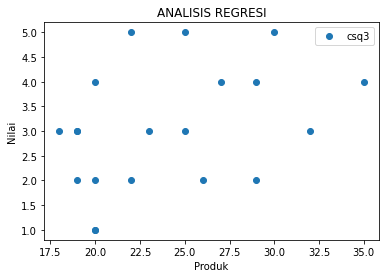

In [ ]:
df.plot(x="csq1", y="csq3", style="o")
plt.title("ANALISIS REGRESI")
plt.xlabel("Produk")
plt.ylabel("Nilai")
plt.show

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
data = df.drop(columns=['no.','csq1','csq2', 'csq6', 'csq9', 'csq11'], axis=1)

In [ ]:
data

,csq3,csq4,csq5,csq7,csq8,csq10
0,3,4,bolu,10,4,5
1,2,4,donat,7,5,5
2,5,3,kue,8,4,5
3,3,4,bolu,9,4,5
4,4,5,snack,9,5,5
5,4,3,kue,6,5,4
6,3,4,roti,5,4,3
7,2,3,donat,3,4,2
8,4,2,roti,2,3,4
9,5,2,kue,7,3,4


In [ ]:
data = pd.get_dummies(data)
data

,csq3,csq4,csq7,csq8,csq10,csq5_bolu,csq5_donat,csq5_kue,csq5_roti,csq5_snack
0,3,4,10,4,5,1,0,0,0,0
1,2,4,7,5,5,0,1,0,0,0
2,5,3,8,4,5,0,0,1,0,0
3,3,4,9,4,5,1,0,0,0,0
4,4,5,9,5,5,0,0,0,0,1
5,4,3,6,5,4,0,0,1,0,0
6,3,4,5,4,3,0,0,0,1,0
7,2,3,3,4,2,0,1,0,0,0
8,4,2,2,3,4,0,0,0,1,0
9,5,2,7,3,4,0,0,1,0,0


In [ ]:
predic = ['csq3', 'csq4', 'csq7', 'csq8', 'csq5_bolu',	'csq5_donat',	'csq5_kue',	'csq5_roti',	'csq5_snack']
X = data[predic]
Y = data['csq10']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

,csq3,csq4,csq7,csq8,csq5_bolu,csq5_donat,csq5_kue,csq5_roti,csq5_snack
0,0.50,0.75,1.000000,0.666667,1.0,0.0,0.0,0.0,0.0
1,0.25,0.75,0.666667,1.000000,0.0,1.0,0.0,0.0,0.0
2,1.00,0.50,0.777778,0.666667,0.0,0.0,1.0,0.0,0.0
3,0.50,0.75,0.888889,0.666667,1.0,0.0,0.0,0.0,0.0
4,0.75,1.00,0.888889,1.000000,0.0,0.0,0.0,0.0,1.0


In [ ]:
from random import random
from pandas import DataFrame
from statsmodels.api import OLS
from patsy import dmatrices
import statsmodels.api as sm

y,x = dmatrices("csq10 ~ csq3	+ csq4 + csq7 + csq8	+ csq5_bolu	+ csq5_donat	+ csq5_kue	+ csq5_roti	+ csq5_snack", data = data)
### y_data is the name of the dependent variable in your data ### 
model_fit = sm.OLS(y,x)
results = model_fit.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  csq10   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     6.725
Date:                Thu, 28 Oct 2021   Prob (F-statistic):            0.00252
Time:                        04:09:29   Log-Likelihood:                -15.515
No. Observations:                  20   AIC:                             49.03
Df Residuals:                      11   BIC:                             57.99
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3436      0.872      0.394      0.7

#REGRESI LINIER SEDERHANA

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("iris.csv")
df



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
print("Jumlah data : " + str(len(df.index)))

df.describe()

Jumlah data : 150


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


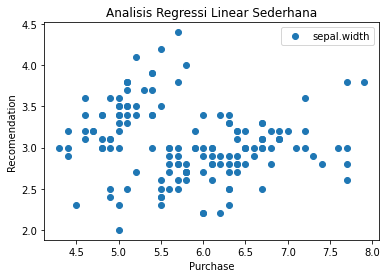

In [ ]:
df.plot(x = "sepal.length", y = "sepal.width", style = 'o')
plt.title("Analisis Regressi Linear Sederhana")
plt.xlabel("Purchase")
plt.ylabel("Recomendation")
plt.show()

In [ ]:
x = df["sepal.length"].values
y = df["sepal.width"].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
x_train = x_train.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)

3.234224058885099


In [ ]:
print(regressor.coef_)

[-0.03075937]


In [ ]:
x_test = x_test.reshape(-1,1)
y_pred = regressor.predict(x_test)
y_pred

array([3.05581972, 3.04966784, 3.06504753, 3.00968066, 3.08042721,
       3.04044003, 3.08042721, 3.02813628, 3.02506035, 3.0465919 ,
       3.0465919 , 3.03736409, 3.0465919 , 3.03428816, 3.0465919 ,
       3.08350315, 3.04966784, 3.06504753, 3.08657909, 3.06812346,
       3.06197159, 3.06197159, 3.08657909, 3.09888283, 3.04351597,
       3.09273096, 3.07735127, 3.04351597, 3.08042721, 3.08042721])

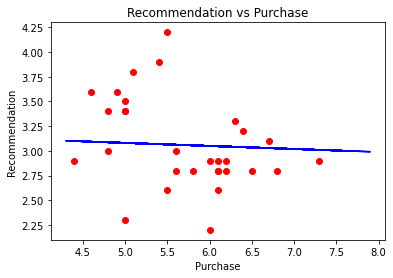

In [ ]:
#visualisasi akhir
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Recommendation vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Recommendation')
plt.show()